In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In our analysis so far, we have assumed a simple frictional failure criterion, where the shear stress $\tau$ required for slip is proportional to the normal stress $\sigma$:
$$\tau = \mu \sigma,$$
as illustrated below.  But if we think carefully about that failure criterion for $\sigma$ near zero, it would seem that we've missed something, as this criterion predicts that a fault can slip with essentially zero shear stress.  But if we're thinking about an intact rock, that's clearly incorrect, and even for a cohesive rock, it seems wrong.  Imagine, for instance, that you take two bricks, place them next to each other, and put some clay in between.  There is no normal stress on the brick interface, but clearly you have to apply significant stress to allow the bricks to slip. 


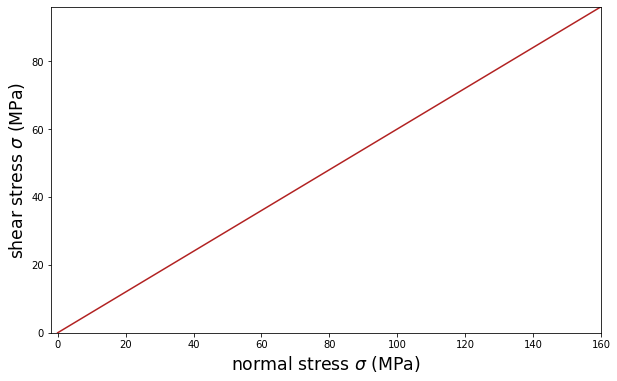

In [3]:
plt.figure(figsize=(10,6))

# compute shear and normal stresses
mu=0.6
sigma=np.linspace(-2,160,50000)
tau_normal_fric=sigma*mu
tau_normal_fric[sigma<0]=float('nan')

# plot them
plt.plot(sigma,tau_normal_fric,color='firebrick');
plt.xlim([np.min(sigma),np.max(sigma)])
plt.ylim([0,np.nanmax(tau_normal_fric)])
plt.xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
plt.ylabel(r'shear stress $\sigma$ (MPa)',fontsize='xx-large');
plt.gca().set_aspect('equal')


What we're missing, then, is _cohesion_: the stickiness of the clay, or the whole range of atomic bonds that exist before the rock is broken.  To determine how rocks fail at low normal stress, we are not thinking about shearing a suite of asperities but about ripping the asperities apart.  Understanding the physics of ripping asperities apart is complex.  It requires understanding how small cracks grow and link up, so we'll just note the results obtained in the 1920s.  

At low normal stress, when cohesion is important, the stresses required for a rock to fail are

$$\tau = \sqrt{C^2 + 2C\sigma},$$

where $C$ is the cohesive strength of the rock. The rock will break as it moves above or to the left of this curve, illustrated below.


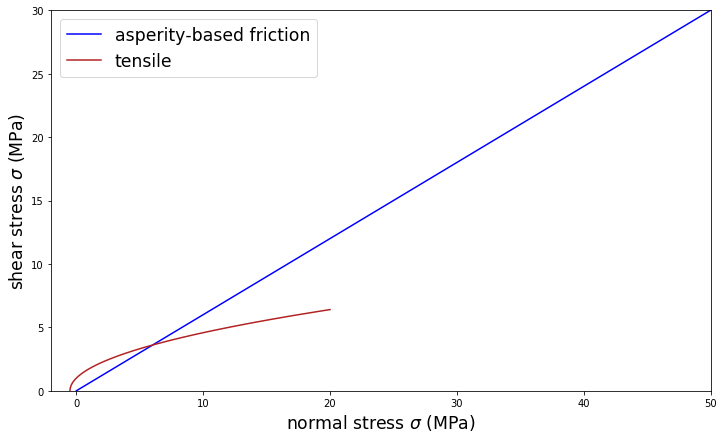

In [7]:
plt.figure(figsize=(12,7))
# pick a cohesive strength, in MPa
C=1.
# and compute the tensile failure criterion
tau_crack=np.power(C**2 +2*C*sigma,0.5)
tau_crack[sigma>20]=float('nan')

# plot them
plt.plot(sigma,tau_normal_fric,label='asperity-based friction',color='blue');
plt.plot(sigma,tau_crack,label='tensile',color='firebrick');

plt.legend(fontsize='xx-large');
plt.xlim([np.min(sigma),np.max(sigma)])
plt.ylim([0,np.nanmax(tau_normal_fric)])
plt.xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
plt.ylabel(r'shear stress $\sigma$ (MPa)',fontsize='xx-large');
plt.gca().set_aspect('equal')

To account for cohesion in frictional sliding, it's common to write the following combined failure criterion:
<br>
$\tau = \sqrt{C^2 + 2C\sigma}$ when $\sigma < 0$ and

$\tau = C+\mu \sigma$ when $\sigma>0$.


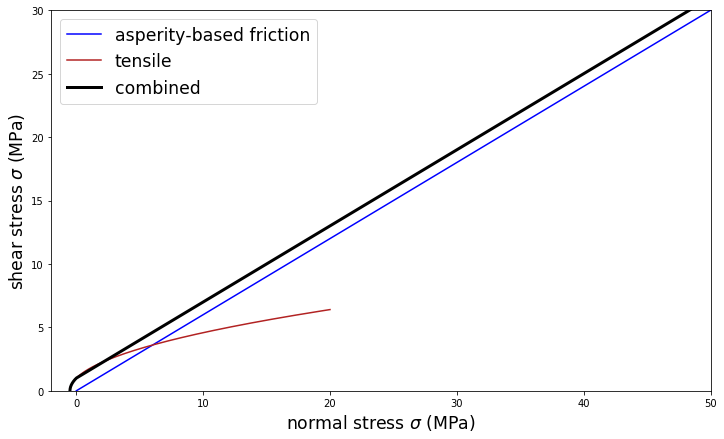

In [8]:
plt.figure(figsize=(12,7))

# compute the combined failure criterion
tau=np.power(C**2 +2*C*sigma,0.5)
tau[sigma>0]=C+mu*sigma[sigma>0]

# plot them
plt.plot(sigma,tau_normal_fric,label='asperity-based friction',color='blue');
plt.plot(sigma,tau_crack,label='tensile',color='firebrick');
plt.plot(sigma,tau,label='combined',color='black',linewidth=3);

plt.legend(fontsize='xx-large');
plt.xlim([np.min(sigma),np.max(sigma)])
plt.ylim([0,np.nanmax(tau_normal_fric)])
plt.xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
plt.ylabel(r'shear stress $\sigma$ (MPa)',fontsize='xx-large');
plt.gca().set_aspect('equal')

We can now use our understanding of low-stress brittle failure to think about what might happen during magma intrusions.  Let's say magma intrudes at a depth less than 1 km.  The pressure in the magma may be of order 15 MPa.  Since the magma is a fluid, it's likely that there isn't a strongly preferential stress, so $\sigma_1$ and $\sigma_3$ are likely close to each other.  We'll assume that the _differential stress_ $\sigma_1-\sigma_3$ is 0.5 MPa.  Since the magma pressure is the average of the principal stresses, that makes $\sigma_1 = 15.5$ MPa and $\sigma_3 = $ 14.5 MPa, and we can plot the stress on a range of potential fault planes in the cooling,solidifying magma along with the failure criterion below.

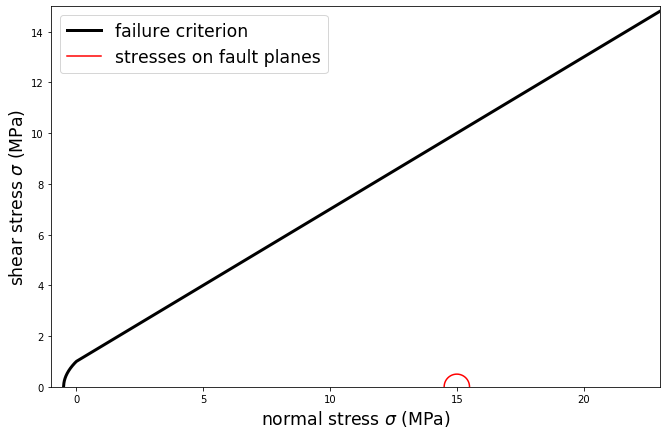

In [9]:
plt.figure(figsize=(12,7))

# plot the failure criterion
plt.plot(sigma,tau,label='failure criterion',color='black',linewidth=3);

# and the ambient stresses resolved on a range of fault planes
alph=np.linspace(0,np.pi/2,3000)
sigma1,sigma3=15.5,14.5
sdiff=(sigma1-sigma3)/2
smean=(sigma3+sigma1)/2

tau_ambient = sdiff*np.sin(2*alph)
sig_ambient = smean-sdiff*np.cos(2*alph)

plt.plot(sig_ambient,tau_ambient,color='red',label='stresses on fault planes')

plt.legend(fontsize='xx-large');
plt.xlim([-1,23])
plt.ylim([0,15])
plt.xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
plt.ylabel(r'shear stress $\sigma$ (MPa)',fontsize='xx-large');
plt.gca().set_aspect('equal')

As the magma solidifies and then cools, it contracts.  That means that the pressure in the rock goes down.  Cooling doesn't change the differential stress; both $\sigma_1$ and $\sigma_3$ decrease by the same amount.  The Mohr circle thus retains its size but moves to the left.

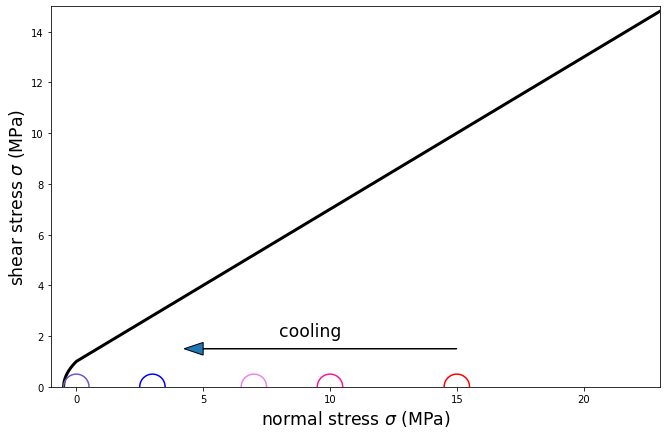

In [10]:
plt.figure(figsize=(12,7))

# plot the failure criterion
plt.plot(sigma,tau,label='failure criterion',color='black',linewidth=3);

# and the ambient stresses resolved on a range of fault planes
alph=np.linspace(0,np.pi/2,3000)
sigma1,sigma3=15.5,14.5
sdiff=(sigma1-sigma3)/2
smean=(sigma3+sigma1)/2

tau_ambient = sdiff*np.sin(2*alph)
sig_ambient = smean-sdiff*np.cos(2*alph)

plt.plot(sig_ambient,tau_ambient,color='red',label='stresses on fault planes')

# also plot for lower stresses
cols=['deeppink','violet','blue','slateblue']
plow=[5,8,12,15]
for k in range(0,len(plow)):
    sigma1_now,sigma3_now=sigma1-plow[k],sigma3-plow[k]
    sdiff=(sigma1_now-sigma3_now)/2
    smean=(sigma3_now+sigma1_now)/2

    tau_ambient = sdiff*np.sin(2*alph)
    sig_ambient = smean-sdiff*np.cos(2*alph)

    plt.plot(sig_ambient,tau_ambient,color=cols[k],label='stresses on fault planes')

plt.xlim([-1,23])
plt.ylim([0,15])
plt.xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
plt.ylabel(r'shear stress $\sigma$ (MPa)',fontsize='xx-large');
plt.gca().set_aspect('equal')

plt.arrow(15,1.5,-10,0,head_width=0.5);
plt.text(8,2,'cooling',fontsize='xx-large');

Let's zoom in on what happens when the rock contracts enough to touch the failure criterion.

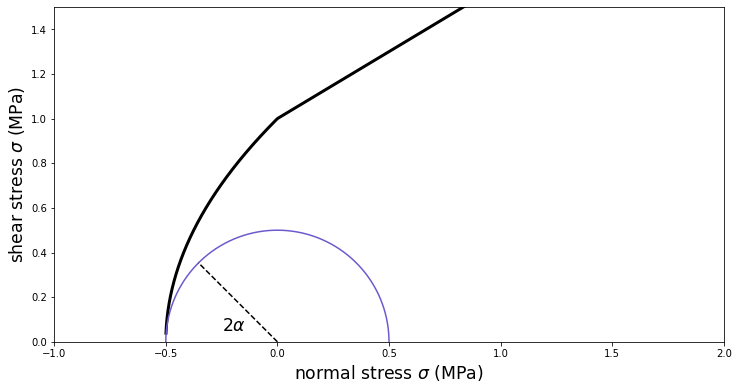

In [11]:
plt.figure(figsize=(12,7))

# plot the failure criterion
plt.plot(sigma,tau,label='failure criterion',color='black',linewidth=3);

# and the ambient stresses resolved on a range of fault planes
alph=np.linspace(0,np.pi/2,3000)
sigma1,sigma3=15.5-15,14.5-15
sdiff=(sigma1-sigma3)/2
smean=(sigma3+sigma1)/2

tau_ambient = sdiff*np.sin(2*alph)
sig_ambient = smean-sdiff*np.cos(2*alph)

plt.plot(sig_ambient,tau_ambient,color='slateblue',label='stresses on fault planes')

plt.xlim([-1,2])
plt.ylim([0,1.5])
plt.xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
plt.ylabel(r'shear stress $\sigma$ (MPa)',fontsize='xx-large');
plt.gca().set_aspect('equal')

ix=int(len(alph)/4);
plt.plot([smean,sig_ambient[ix]],[0,tau_ambient[ix]],color='black',linestyle='--');
plt.text(smean-sdiff/2,sdiff/10,r'$2\alpha$',fontsize='xx-large');

The fault that reaches failure first thus has an angle $\alpha=0$ from the most compressive stress direction.  In other words, the new cracks are parallel to $\sigma_1$ and perpendicular to $\sigma_3$.

Q1: Does it make physical sense for cracks to form on planes perpendicular to $\sigma_3$ when $\sigma_3<0$?  
<br><br><br><br>

Q2: What are some everyday situations where you could observe tensile cracks like this?

<br><br><br><br>

Q3: What are some more geological examples of tensile cracking?
<br><br><br><br>